<a href="https://colab.research.google.com/github/Geevanandam/BikeSharingAssignment/blob/main/BikeSharingAssignment_Geeva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data for Analysis

In [1]:
# @title Import data file from Github

!wget -c -O day.csv https://raw.githubusercontent.com/Geevanandam/BikeSharingAssignment/refs/heads/main/day.csv


--2024-09-25 16:03:47--  https://raw.githubusercontent.com/Geevanandam/BikeSharingAssignment/refs/heads/main/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57542 (56K) [text/plain]
Saving to: ‘day.csv’

day.csv             100%[===================>]  56.19K  --.-KB/s    in 0.01s   

2024-09-25 16:03:47 (4.55 MB/s) - ‘day.csv’ saved [57542/57542]



# Prepare Data

In [2]:
# @title Import Statements
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [3]:
# @title Export data to Frame for processing

bikedf = pd.read_csv('/content/day.csv')

# Print the first few rows of the DataFrame to verify it's loaded
print(bikedf.head())


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [4]:
bikedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikedf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
print(bikedf.shape)

(730, 16)


In [7]:
# Analysing Data and Data dictionary columns 'instant','dteday','casual' and 'registered' can be dropped
bikedf.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
bikedf_new=bikedf[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bikedf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [9]:
# Map categorical variable values (assuming a data dictionary is available)
bikedf_new['season'] = bikedf_new['season'].map({1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'})
bikedf_new['weathersit'] = bikedf_new['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain + Thunderstorm'})
bikedf_new['mnth']=bikedf_new['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

<ipython-input-9-d2db5c05b97f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikedf_new['season'] = bikedf_new['season'].map({1: 'Spring', 2: 'Summer', 3: 'Autumn', 4: 'Winter'})
<ipython-input-9-d2db5c05b97f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikedf_new['weathersit'] = bikedf_new['weathersit'].map({1: 'Clear', 2: 'Cloudy', 3: 'Light Rain', 4: 'Heavy Rain + Thunderstorm'})
<ipython-input-9-d2db5c05b97f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [10]:
# prompt: apply get dummies
# Apply get_dummies to categorical features
bikedf_new = pd.get_dummies(bikedf_new, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True, dtype=int)
bikedf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_Spring          730 non-null    int64  
 9   season_Summer          730 non-null    int64  
 10  season_Winter          730 non-null    int64  
 11  mnth_aug               730 non-null    int64  
 12  mnth_dec               730 non-null    int64  
 13  mnth_feb               730 non-null    int64  
 14  mnth_jan               730 non-null    int64  
 15  mnth_j

In [11]:
# @title Splitting the Data
# Splitting the data to Train and Test(70:30 Ratio)

# Check the shape before spliting
bikedf_new.shape

# Check the info before spliting
bikedf_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_Spring          730 non-null    int64  
 9   season_Summer          730 non-null    int64  
 10  season_Winter          730 non-null    int64  
 11  mnth_aug               730 non-null    int64  
 12  mnth_dec               730 non-null    int64  
 13  mnth_feb               730 non-null    int64  
 14  mnth_jan               730 non-null    int64  
 15  mnth_j

In [12]:
np.random.seed(0)
bikedf_train, bikedf_test = train_test_split(bikedf_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [13]:
#Verify the Train and Test Data Frames after split
bikedf_train.info()

bikedf_train.shape

bikedf_test.info()

bikedf_test.shape

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     510 non-null    int64  
 1   holiday                510 non-null    int64  
 2   workingday             510 non-null    int64  
 3   temp                   510 non-null    float64
 4   atemp                  510 non-null    float64
 5   hum                    510 non-null    float64
 6   windspeed              510 non-null    float64
 7   cnt                    510 non-null    int64  
 8   season_Spring          510 non-null    int64  
 9   season_Summer          510 non-null    int64  
 10  season_Winter          510 non-null    int64  
 11  mnth_aug               510 non-null    int64  
 12  mnth_dec               510 non-null    int64  
 13  mnth_feb               510 non-null    int64  
 14  mnth_jan               510 non-null    int64  
 15  mnth_jul 

(219, 30)

# Exploratory data analysis(EDA)
Perform EDA on Training Dataset(bikedf_train)

# Univariate Analysis

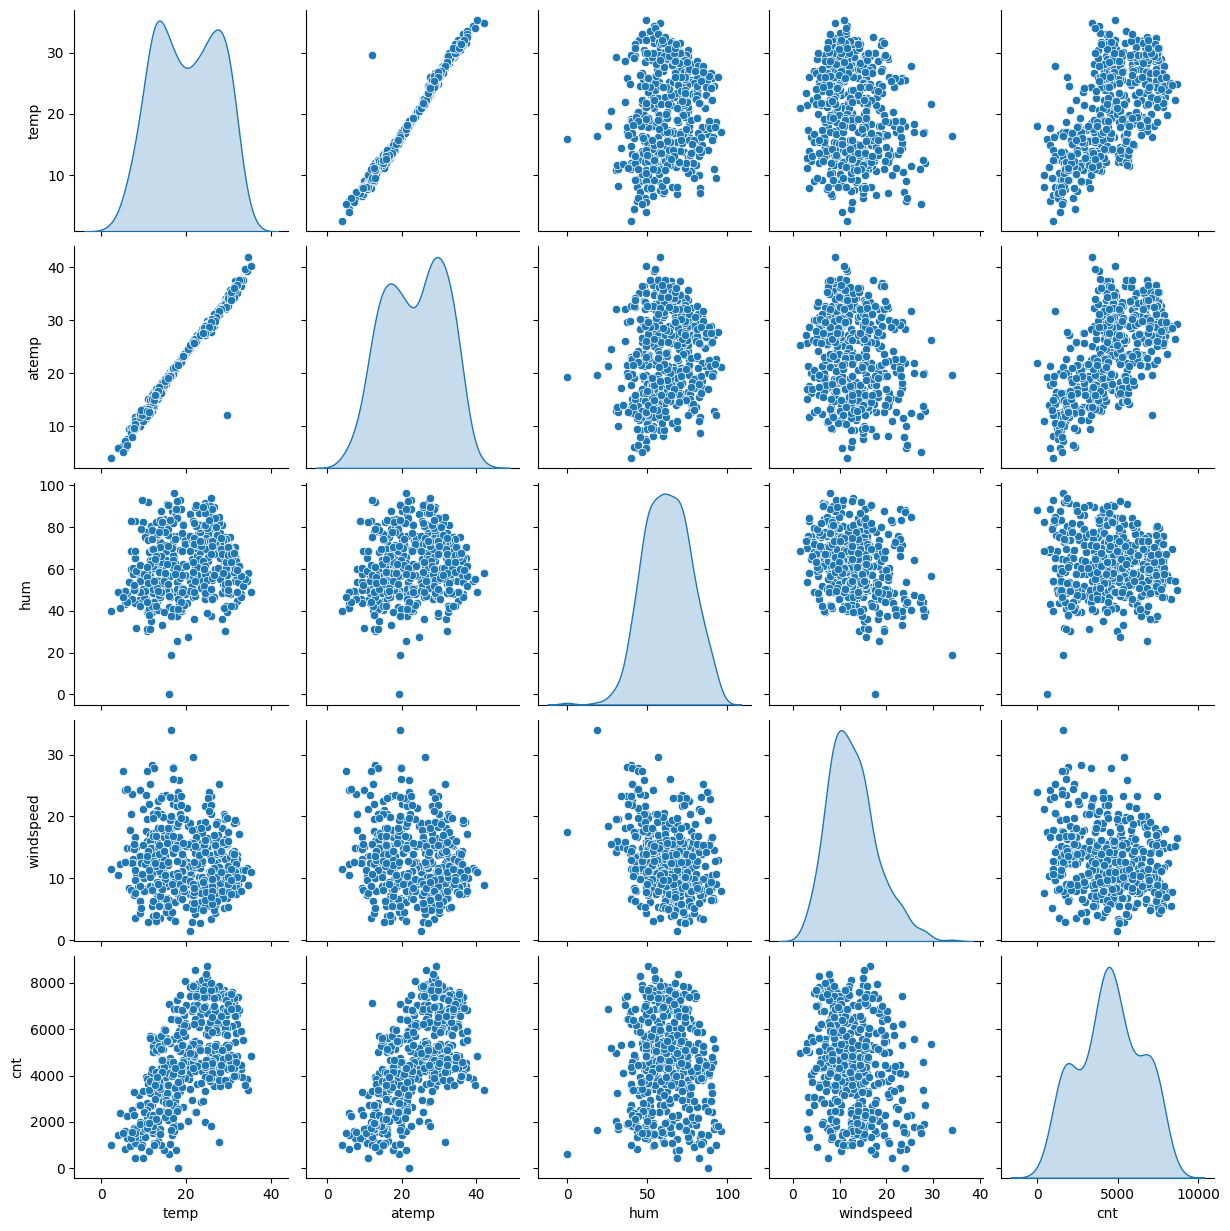

In [14]:
# @title PairPlot:
# Let us begin with Pair plot of numeric variables

bikedf_train.columns

#Create a new dataframe with only numeric variables and prpare a pairplot for observation
bikedf_num=bikedf_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bikedf_num, diag_kind='kde')
plt.show()

# Observations
1. Temperature and Bike Demand (temp, atemp vs cnt):
  There is a strong positive correlation between temperature (and perceived temperature atemp) and bike demand. As temperature rises, so does bike usage, suggesting warmer weather leads to higher demand.
2. Humidity and Bike Demand (hum vs cnt):
  The relationship between humidity and demand appears weak. There might be a slight negative correlation, but it's not very strong.
3. Windspeed and Bike Demand (windspeed vs cnt):
  Windspeed shows no significant relationship with bike demand, with points fairly scattered and no clear trend observed.

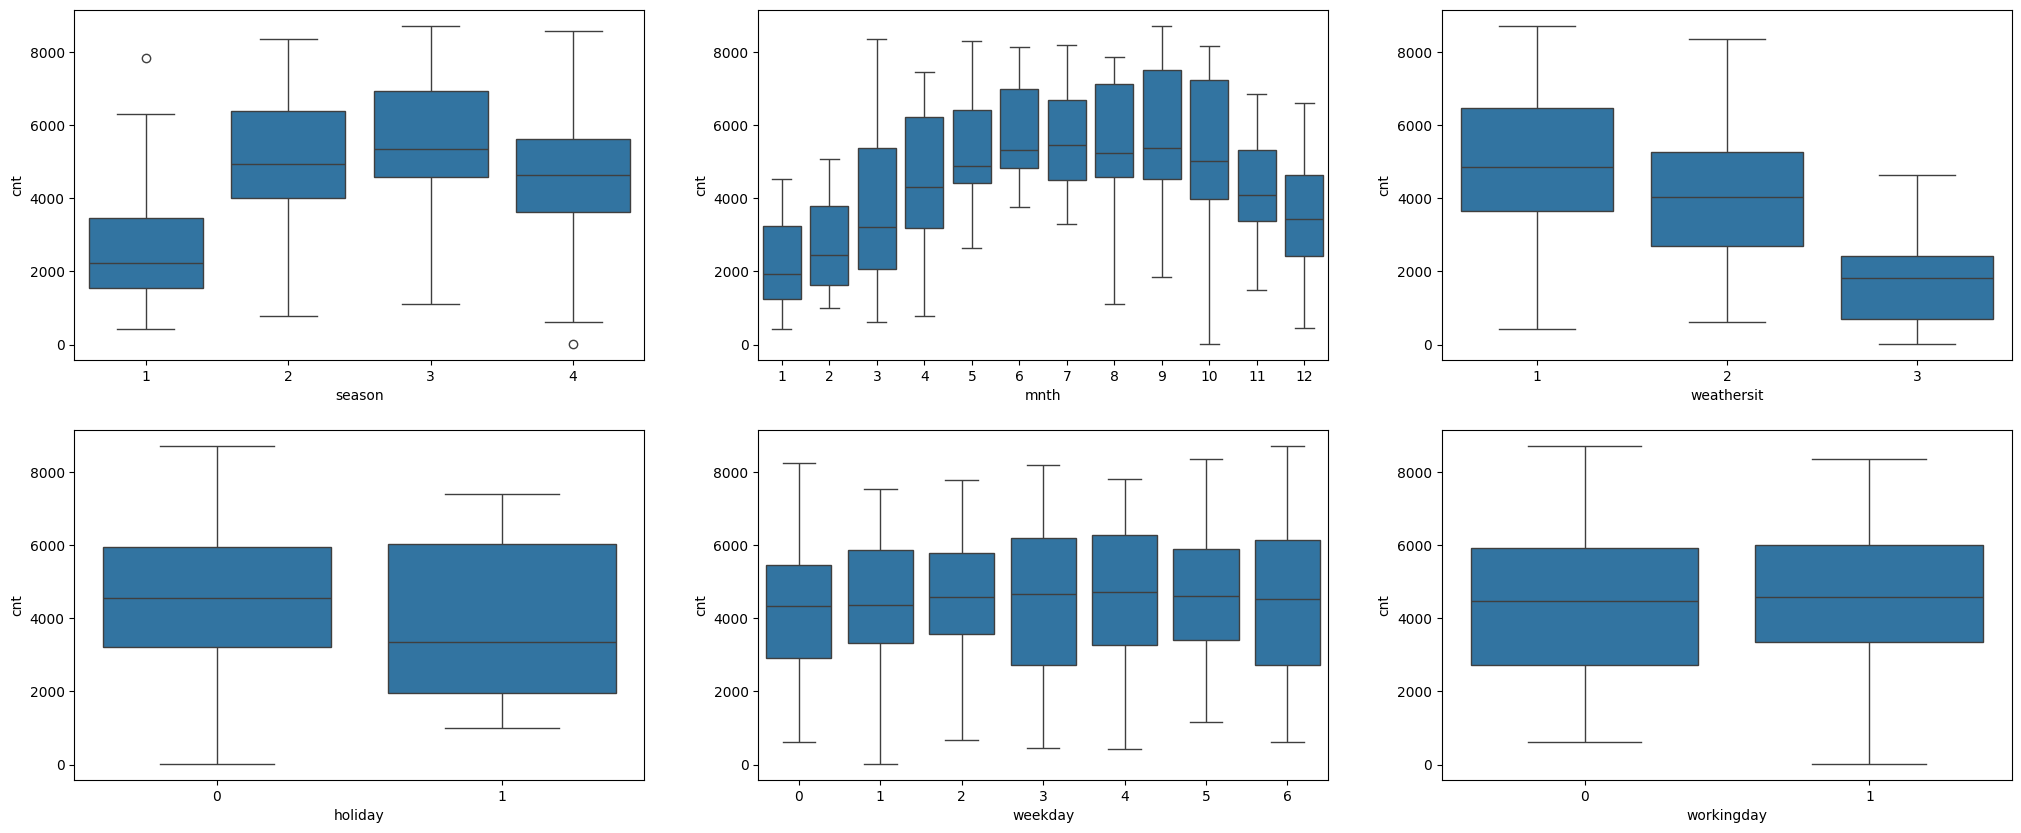

In [15]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikedf)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedf)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedf)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedf)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedf)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikedf)
plt.show()

# Observations

1. Season vs. Bike Demand (season vs cnt):

    Bike demand is highest during season 3 (fall) and season 4 (winter), with median values significantly higher than other seasons.
    Season 1 (spring) has the lowest bike demand overall.

2. Month vs. Bike Demand (mnth vs cnt):

    There is a clear upward trend in bike demand from January to June, peaking around July and August.
    Demand starts to decline from October onward, with December showing one of the lowest demands.

3. Weather Situation vs. Bike Demand (weathersit vs cnt):

    The best weather (category 1) corresponds to the highest demand.
    Worse weather conditions (category 3) see a sharp drop in bike demand.
4. Holiday vs. Bike Demand (holiday vs cnt):

    There is no significant difference in bike demand between holidays (1) and non-holidays (0).
5. Weekday vs. Bike Demand (weekday vs cnt):

    Bike demand is quite consistent across all weekdays, with a slight decrease on the weekend (especially on day 0).
6. Working Day vs. Bike Demand (workingday vs cnt):

    There is little difference in demand between working days (1) and non-working days (0), though demand on non-working days appears slightly more variable.

# Bivariate Analysis

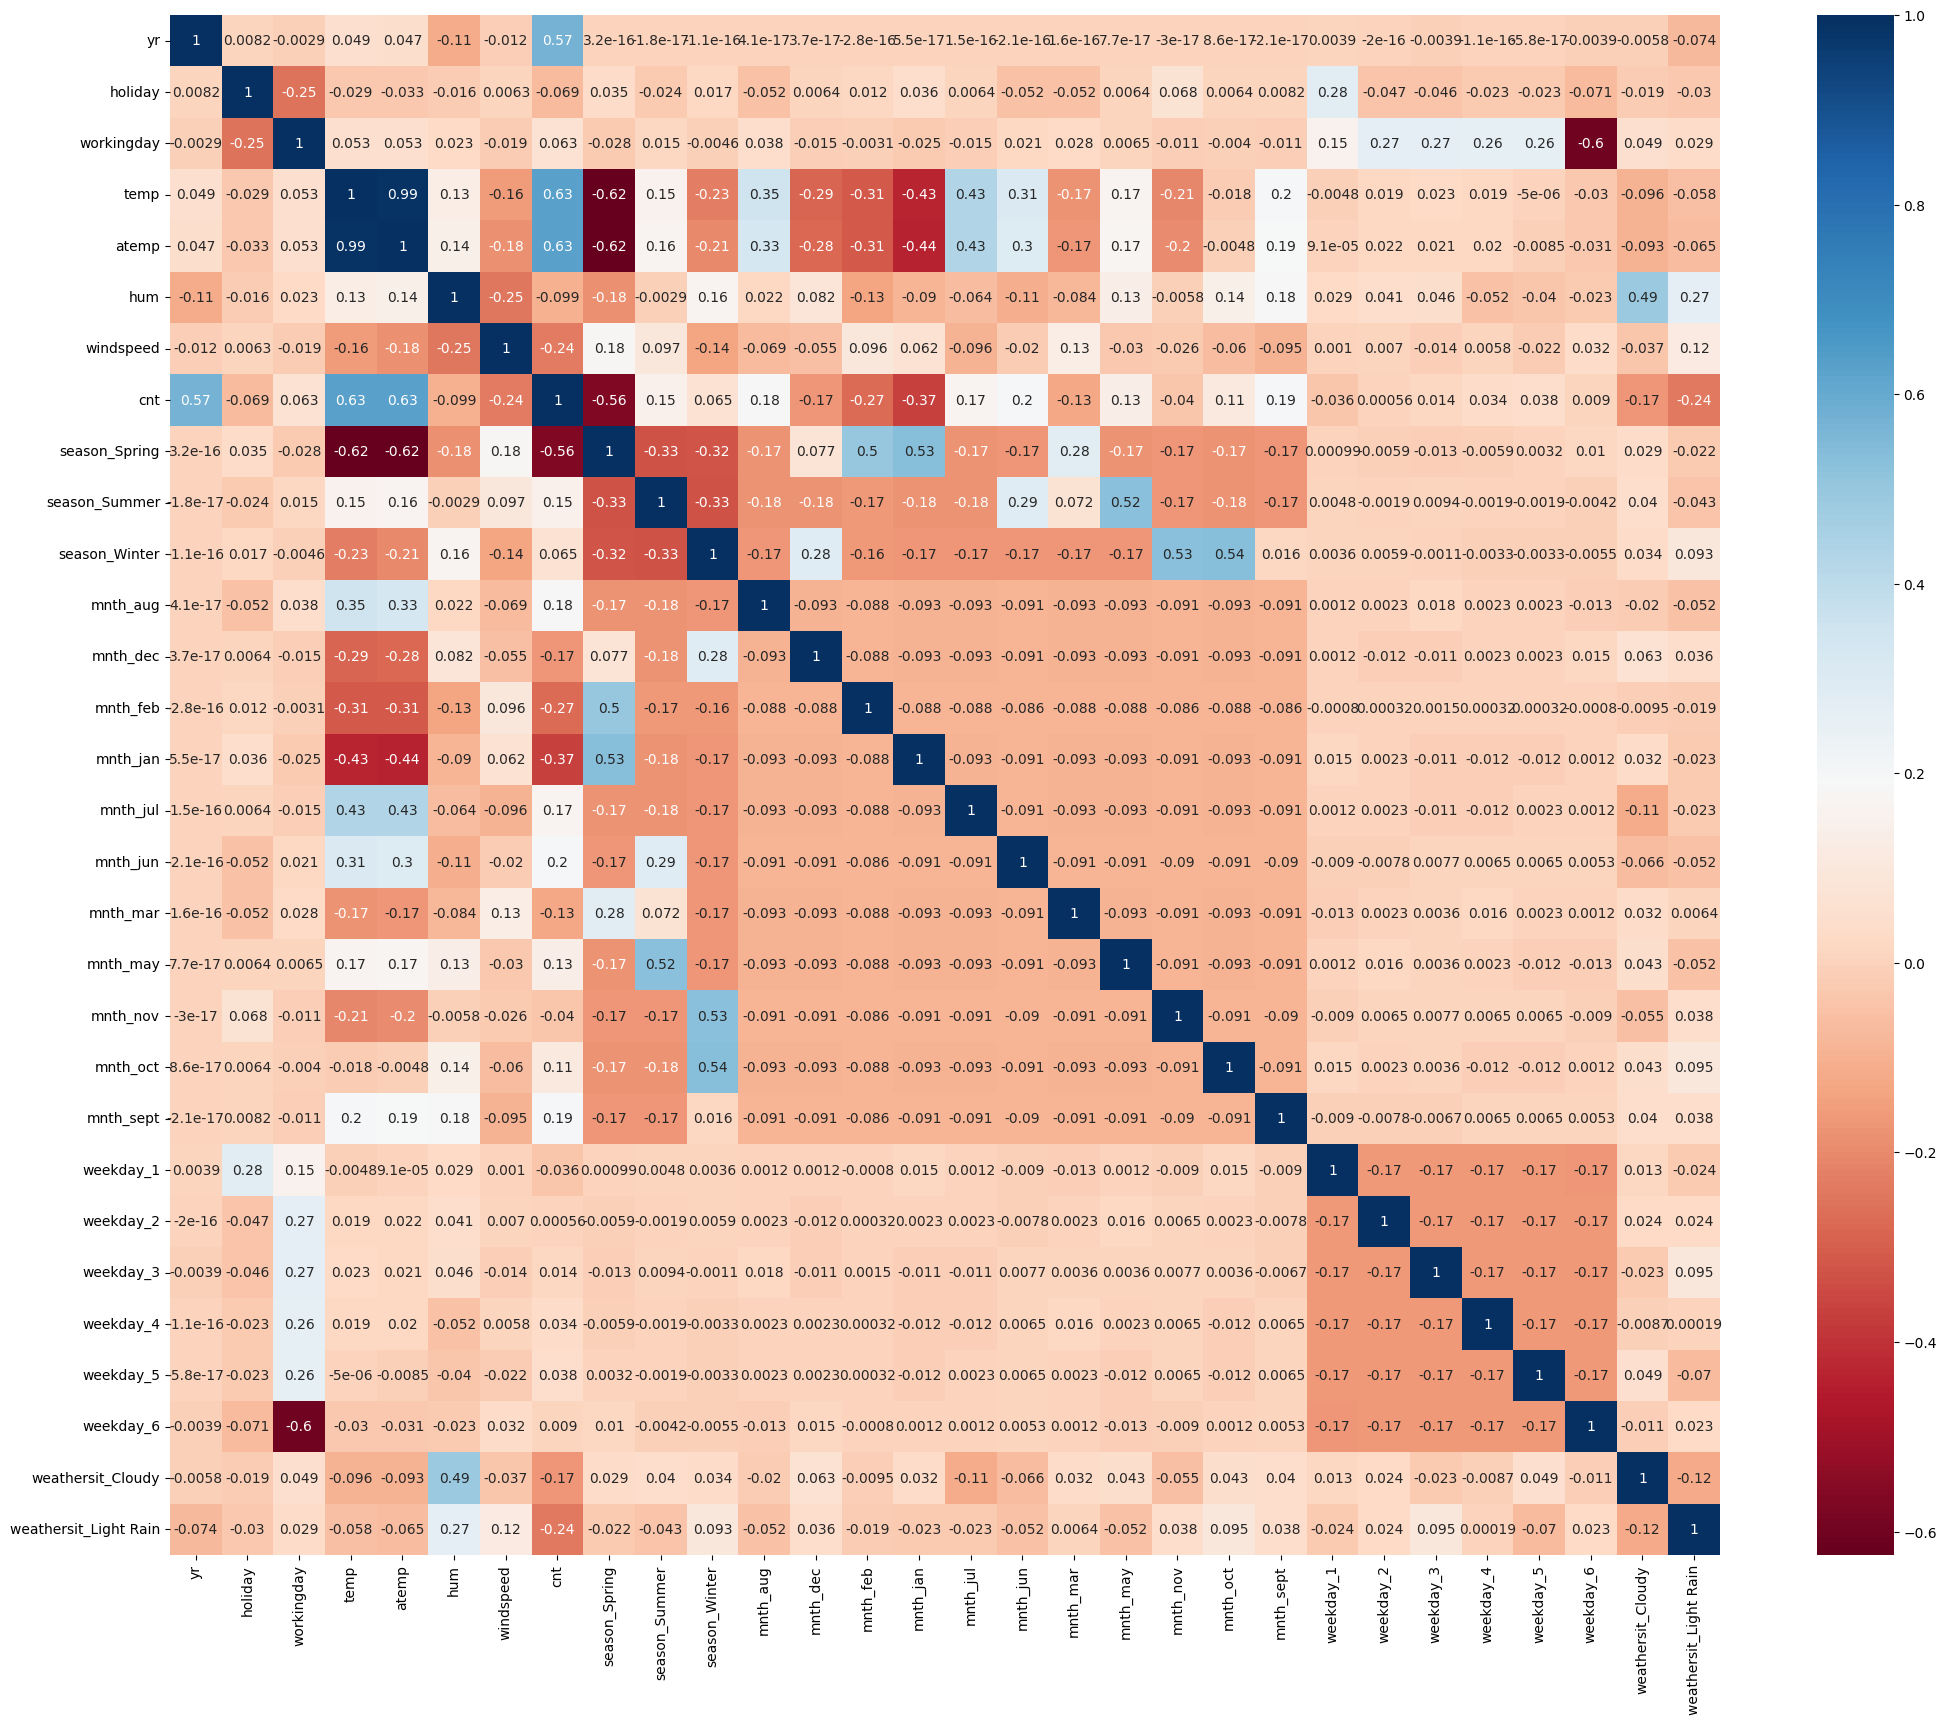

In [16]:
# @title Correlate Analysis
plt.figure(figsize = (25,20))
sns.heatmap(bikedf_new.corr(), annot = True, cmap="RdBu")
plt.show()

# Strong Positive Correlations:
Temperature (temp and atemp) vs. Bike Demand (cnt):
  Both temp (0.83) and atemp (0.86) have a high positive correlation with bike demand. This confirms that higher temperatures drive higher bike demand, which aligns with the earlier observation from the pair plots.
Year (yr) vs. Bike Demand (cnt):
  The year variable has a positive correlation (0.57) with demand, which suggests that bike demand has increased over time. This could imply a growing adoption of bike-sharing services over the years.
# Strong Negative Correlations:
Weather Situation (Light Rain, Cloudy, etc.) vs. Bike Demand:
  The weathersit_Light Rain and weathersit_Cloudy features show negative correlations with bike demand:
  Light rain: -0.45
  Cloudy: -0.28
  As weather conditions worsen, demand for bikes decreases significantly.
Humidity (hum) vs. Bike Demand:
  Humidity has a weak negative correlation (-0.32) with bike demand. This suggests that higher humidity slightly discourages bike use.
# Other Observations:
Multicollinearity:
  Temperature (temp) and apparent temperature (atemp) are highly correlated with each other (0.99). This multicollinearity could cause issues in model training, so we can consider using just one of these variables.
  There is also a notable correlation between some months, such as mnth_july and mnth_aug (-0.91), which indicates seasonality.
Seasonality Effects:
  Seasonal variables like season_Summer, season_Winter, and season_Spring show moderate correlations with bike demand.
  Winter has a positive correlation (0.54), while Spring has a negative correlation (-0.26), indicating higher demand in winter and lower demand in spring.
Working Day and Holiday:
  Neither workingday nor holiday shows a strong correlation with bike demand, with correlations around 0.03. This means bike demand is fairly stable across holidays and working days.
Wind Speed:
  windspeed has a weak negative correlation (-0.23) with bike demand, suggesting that strong winds might slightly reduce bike usage.

# Overall Observations from EDA figures
High demand is observed in fall and summer with warm, clear weather conditions and higher temperatures.

---


Poor weather conditions (rain, humidity) and wind negatively affect bike demand.

---


Seasonality and weather are key factors that need to be considered when predicting bike demand.

---


There’s a steady increase in bike demand over time, indicating growing popularity of bike-sharing systems.

---



# Rescaling the features


In [17]:
scaler = MinMaxScaler()

# Checking the values before scaling
bikedf_train.head()

bikedf_train.columns


# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

bikedf_train[num_vars] = scaler.fit_transform(bikedf_train[num_vars])

# Checking values after scaling
bikedf_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,0,1,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,1,0,...,0,0,0,0,0,0,0,0,0,0


# Build a Linear Model by dividing X and Y Sets

In [18]:
bikedf_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_oct,mnth_sept,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Cloudy,weathersit_Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.24902,0.247059,...,0.084314,0.082353,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.43287,0.431725,...,0.278131,0.275172,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train = bikedf_train.drop(['cnt'], axis=1)
y_train = bikedf_train['cnt']

In [20]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col = X_train.columns[rfe.support_]
col

X_train.columns[~rfe.support_]

X_train_rfe = X_train[col]

# Model 1

In [24]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values.astype(float), i) for i in range(X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,temp,353.99
2,atemp,351.62
3,hum,22.90
4,windspeed,5.15
6,season_Winter,2.75
5,season_Spring,2.68
13,weathersit_Cloudy,2.26
0,yr,2.05
10,mnth_nov,1.83
8,mnth_jul,1.41


In [25]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1.astype(float)).fit()


# Check the parameters obtained

lr1.params

,0
const,0.360643
yr,0.229045
temp,0.327628
atemp,0.138868
hum,-0.170456
windspeed,-0.184512
season_Spring,-0.124363
season_Winter,0.077731
mnth_dec,-0.040935
mnth_jul,-0.054367


In [26]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     169.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.08e-183
Time:                        16:14:32   Log-Likelihood:                 502.27
No. Observations:                 510   AIC:                            -972.5
Df Residuals:                     494   BIC:                            -904.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

# Model 2

In [27]:
#Removing the variable 'atemp' based on its High p-value & High VIF
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [28]:

# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,22.47
1,temp,15.82
3,windspeed,5.03
5,season_Winter,2.72
4,season_Spring,2.67
12,weathersit_Cloudy,2.26
0,yr,2.05
9,mnth_nov,1.82
7,mnth_jul,1.41
6,mnth_dec,1.40


In [29]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2.astype(float)).fit()
# Check the parameters obtained

lr2.params

,0
const,0.363239
yr,0.229046
temp,0.455832
hum,-0.168323
windspeed,-0.189392
season_Spring,-0.124722
season_Winter,0.078848
mnth_dec,-0.041033
mnth_jul,-0.054433
mnth_mar,0.049063


In [30]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.31e-184
Time:                        16:16:54   Log-Likelihood:                 501.74
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     495   BIC:                            -910.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.36

# Model 3

In [31]:
#Removing the variable 'hum' based on its Very High 'VIF' value
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [32]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,5.00
4,season_Winter,2.35
0,yr,2.04
3,season_Spring,1.90
8,mnth_nov,1.80
11,weathersit_Cloudy,1.53
6,mnth_jul,1.37
5,mnth_dec,1.34
7,mnth_mar,1.22


In [33]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3.astype(float)).fit()
lr3.params

,0
const,0.268588
yr,0.233359
temp,0.426568
windspeed,-0.154471
season_Spring,-0.126408
season_Winter,0.073031
mnth_dec,-0.050360
mnth_jul,-0.047280
mnth_mar,0.055023
mnth_nov,-0.058744


In [34]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.34e-181
Time:                        16:18:47   Log-Likelihood:                 491.83
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     496   BIC:                            -896.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

# Model 4

In [35]:
#Removing the variable 'windspeed' based on its Very High 'VIF' value.

X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [36]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.94
3,season_Winter,2.34
0,yr,2.02
7,mnth_nov,1.75
10,weathersit_Cloudy,1.52
2,season_Spring,1.46
4,mnth_dec,1.34
5,mnth_jul,1.34
6,mnth_mar,1.21
8,mnth_sept,1.21


In [37]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4.astype(float)).fit()
# Check the parameters obtained

lr4.params

,0
const,0.202871
yr,0.231028
temp,0.444312
season_Spring,-0.126726
season_Winter,0.085769
mnth_dec,-0.044757
mnth_jul,-0.040682
mnth_mar,0.054501
mnth_nov,-0.064701
mnth_sept,0.061484


In [38]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     188.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.49e-176
Time:                        16:31:24   Log-Likelihood:                 475.76
No. Observations:                 510   AIC:                            -925.5
Df Residuals:                     497   BIC:                            -870.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

# Model 5

In [39]:
#Removing the variable 'weekday_6' based on its Very High p-value.
X_train_new = X_train_new.drop(["weekday_6"], axis = 1)

In [40]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.86
3,season_Winter,2.34
0,yr,2.02
7,mnth_nov,1.75
9,weathersit_Cloudy,1.52
2,season_Spring,1.43
4,mnth_dec,1.34
5,mnth_jul,1.34
6,mnth_mar,1.21
8,mnth_sept,1.21


In [41]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5.astype(float)).fit()
# Check the parameters obtained

lr5.params

,0
const,0.208006
yr,0.231005
temp,0.441121
season_Spring,-0.127178
season_Winter,0.084582
mnth_dec,-0.044165
mnth_jul,-0.039964
mnth_mar,0.053580
mnth_nov,-0.064146
mnth_sept,0.062380


In [42]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     204.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.56e-176
Time:                        16:34:22   Log-Likelihood:                 474.29
No. Observations:                 510   AIC:                            -924.6
Df Residuals:                     498   BIC:                            -873.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

# Model 6

In [43]:
#Removing the variable 'mnth_jul' based on its High 'p-value'.
X_train_new = X_train_new.drop(["mnth_jul"], axis = 1)

In [44]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float), i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,season_Winter,2.31
1,temp,2.29
0,yr,2.02
6,mnth_nov,1.75
8,weathersit_Cloudy,1.50
2,season_Spring,1.42
4,mnth_dec,1.34
5,mnth_mar,1.21
7,mnth_sept,1.17
9,weathersit_Light Rain,1.05


In [45]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6.astype(float)).fit()
# Check the parameters obtained

lr6.params

,0
const,0.218451
yr,0.231293
temp,0.415570
season_Spring,-0.130771
season_Winter,0.085592
mnth_dec,-0.046062
mnth_mar,0.054962
mnth_nov,-0.066501
mnth_sept,0.068524
weathersit_Cloudy,-0.071989


In [46]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          1.16e-176
Time:                        16:35:50   Log-Likelihood:                 471.79
No. Observations:                 510   AIC:                            -921.6
Df Residuals:                     499   BIC:                            -875.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21